***Comparision of Execution time using Newton Method & LMS Regression***

Libraries Used

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Data Generation

In [ ]:
def generate_data(samples=100, features=4, seed=42):
    np.random.seed(seed)
    X = np.random.randn(samples, features)
    actual_weights = np.array([3.2, -2.1, 4.5, -1.7])
    noise = np.random.randn(samples) * 0.5
    Y = X @ actual_weights + noise
    X = np.hstack((np.ones((samples, 1)), X))
    return X, Y



Newton Regression

In [ ]:
def newton_regression(X, Y, tolerance=1e-6, max_iterations=10):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)
    start_time = time.time()


    for iteration in range(max_iterations):
        predictions = X @ theta
        residuals = Y - predictions

        gradient = -2 * X.T @ residuals
        hessian = 2 * (X.T @ X)

        step = np.linalg.inv(hessian) @ gradient
        theta -= step

        if np.linalg.norm(step) < tolerance:
            break
    newton_time = time.time() - start_time
    return theta, newton_time

LMS Regression

In [ ]:
def lms_regression(X, Y, learning_rate=0.01, tolerance=1e-6, max_iterations=1000):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)
    start_time = time.time()

    time_records = []

    for iteration in range(max_iterations):
        predictions = X @ theta
        residuals = Y - predictions
        gradient = -2 * X.T @ residuals / num_samples

        step = learning_rate * gradient
        theta -= step

        time_records.append(time.time() - start_time)

        if np.linalg.norm(step) < tolerance:
            break
    lms_time = time.time() - start_time
    return theta, lms_time, time_records

Results

In [ ]:
X_data, Y_data = generate_data()

final_weights_newton, time_newton = newton_regression(X_data, Y_data)

final_weights_lms, time_lms,time_records_lms = lms_regression(X_data, Y_data)

normal_eq_weights = np.linalg.inv(X_data.T @ X_data) @ X_data.T @ Y_data

print("Weights from Newton's Method:", final_weights_newton)
print("Execution Time (Newton's Method):", time_newton, "seconds")
print("Weights from LMS Algorithm:", final_weights_lms)
print("Execution Time (LMS Algorithm):", time_lms, "seconds")
print("Weights from Normal Equation:", normal_eq_weights)


Weights from Newton's Method: [-0.02741386  3.22206065 -2.0395719   4.53565216 -1.77341954]
Execution Time (Newton's Method): 0.007601499557495117 seconds
Weights from LMS Algorithm: [-0.02741576  3.22199516 -2.03957035  4.53565422 -1.77342558]
Execution Time (LMS Algorithm): 0.02644515037536621 seconds
Weights from Normal Equation: [-0.02741386  3.22206065 -2.0395719   4.53565216 -1.77341954]


Line Graph Representing the Comparision

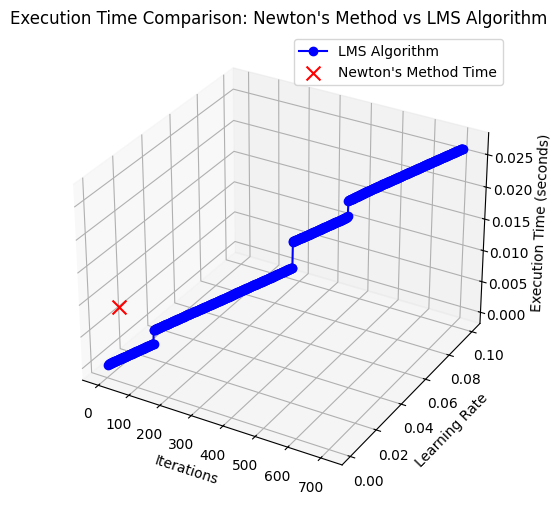

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

iterations = np.arange(len(time_records_lms))
time_values = np.array(time_records_lms)
learning_rates = np.linspace(0.001, 0.1, len(time_records_lms))

ax.plot(iterations, learning_rates, time_values, marker='o', linestyle='-', color='blue', label='LMS Algorithm')
ax.scatter([0], [0.01], [time_newton], color='red', marker='x', s=100, label="Newton's Method Time")

ax.set_xlabel("Iterations")
ax.set_ylabel("Learning Rate")
ax.set_zlabel("Execution Time (seconds)")
ax.set_title("Execution Time Comparison: Newton's Method vs LMS Algorithm")
ax.legend()
plt.show()

->*Newton's Method converges rapidly due to its second-order optimization* approach but incurs a higher computational cost per iteration due to matrix inversion.

->*LMS Algorithm (Gradient Descent) takes more iterations to converge but is computationally efficient per step*, making it suitable for large-scale problems.